<a href="https://colab.research.google.com/github/kocelifk/Image-Classification-with-Tensorflow.i/blob/main/Image_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GÖREV 1:** Problemin anlaşılması

* CIFAR-10, 10 sınıfa ayrılmış birkaç görüntüden oluşan bir veri kümesidir.

0.   Uçak
1.   Araba
2.   Kuş
3.   Kediler
4.   Geyik
5.   Köpek
6.   Kurbağa
7.   At
8.   Gemi
9.   Kamyon


Veri seti Canadian Institute For Advanced Research (CIFAR)'ı temsil eder. Veri seti 60.000 32x32 renkli görüntü ve her sınıfa ait 6000 görüntüden oluşmaktadır. Görüntüler düşük çözünürlüğe sahiptir (32x32).

Veri Seti: https://www.cs.toronto.edu/~kriz/cifar.html






**GÖREV 2:** Kütüphanelerin ve veri setinin import edilmesi

In [39]:
import numpy as np
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [40]:
#Cifar-10 veri setinin import edilmesi
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
#Test ve train veri setinin boyutları
X_train.shape


In [41]:
y_train.shape

(50000, 1)

In [42]:
X_test.shape

(10000, 32, 32, 3)

In [43]:
y_test.shape

(10000, 1)

**GÖREV 3:** Veri görselleştirme

label = [7]


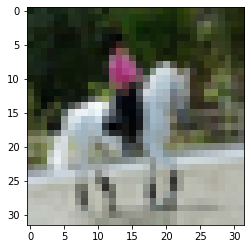

In [44]:
#Örnek bir training görseli seçilmesi ve görselleştirilmesi
i= random.randint(1, len(X_train))
plt.imshow(X_train[i])
print('label = {}'.format(y_train[i]))

label = [5]


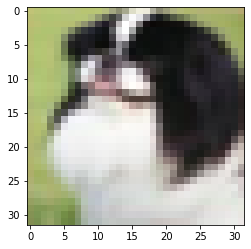

In [45]:
#Örnek bir testing görseli seçilmesi ve görselleştirilmesi
i = random.randint(1, len(X_test))
plt.imshow(X_test[i])
print('label = {}'.format(y_test[i]))

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


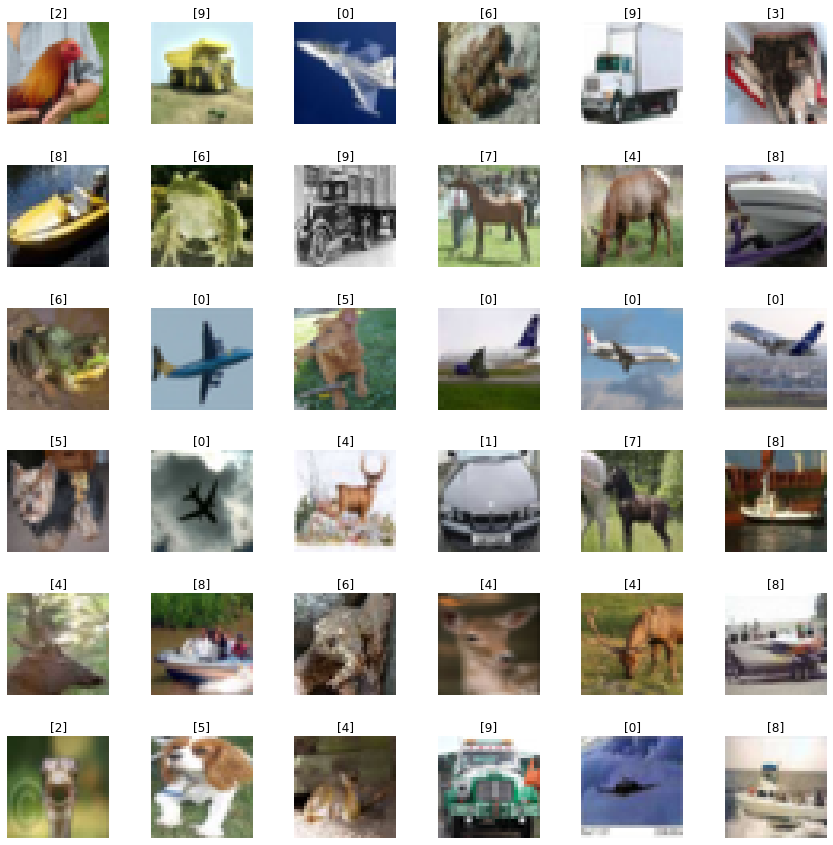

In [46]:
W_grid = 6
L_grid = 6

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training) 
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

Test veri setinden 100 görüntü içeren bir ızgara çizilmesi ve veri kontrolünün sağlanması

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


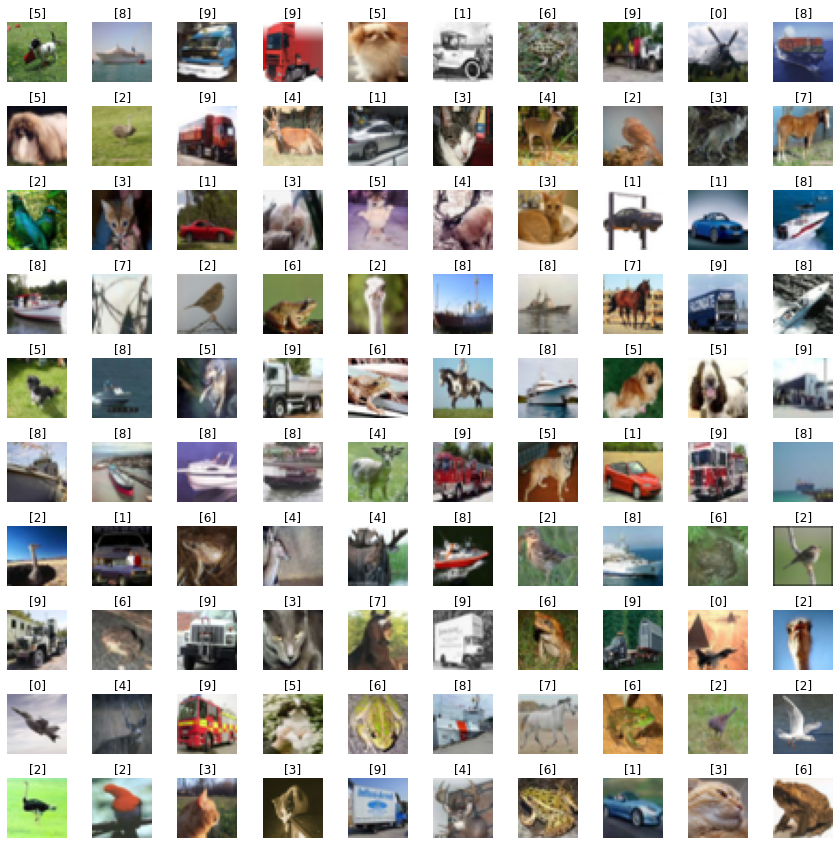

In [47]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()

n_testing = len(X_test)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_testing) 
  axes[i].imshow(X_test[index])
  axes[i].set_title(y_test[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

**GÖREV 4:** Verinin training için hazırlanması

In [48]:
n_training

50000

In [49]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [50]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [51]:
number_cat = 10

In [52]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [53]:
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [54]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [56]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [57]:
#Normalize pixels 

X_train = X_train/255
X_test = X_test/255

In [58]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [59]:
X_train.shape

(50000, 32, 32, 3)

In [60]:
Input_shape = X_train.shape[1:]

In [61]:
Input_shape

(32, 32, 3)

In [62]:
y_train.shape

(50000, 10)

**GÖREV 5:** Keras kullanarak derin sinir ağı modeli oluşturulması

In [63]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))


cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

**GÖREV 6:** Derin sinir ağının derlenmesi ve fit edilmesi

In [64]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss= 'categorical_crossentropy')

In [65]:
epochs = 1
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

98/98 [==============================] - 151s 2s/step - loss: 2.0943


In [66]:
#Modelin JSON'a serialize edilmesi
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
#serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [72]:
from tensorflow.keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn = model_from_json(loaded_model_json)

cnn.load_weights("//content/cifar10_trained_model.h5")
print("loaded model from disk")

loaded model from disk


In [73]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

In [75]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss='categorical_crossentropy')

**GÖREV 7:** Train edilen modelin değerlendirilmesi

In [83]:
evaluation = cnn.evaluate(X_test, y_test)
(evaluation)

313/313 [==============================] - 9s 29ms/step - loss: 0.6917


0.691704511642456

In [84]:
predicted_classes = cnn.predict(X_test)
predicted_classes

array([[7.5273711e-05, 1.4732250e-03, 9.8015415e-03, ..., 4.6783887e-04,
        2.2102592e-03, 5.4500182e-04],
       [5.1105261e-04, 1.4384346e-03, 2.3214666e-08, ..., 5.7524124e-10,
        9.9789470e-01, 1.5569726e-04],
       [3.9572571e-03, 1.1888195e-02, 1.0614806e-04, ..., 7.6050196e-06,
        9.7400069e-01, 9.9703753e-03],
       ...,
       [2.5744280e-08, 2.4722121e-08, 9.0254063e-05, ..., 5.6979252e-04,
        1.0796902e-07, 6.8960084e-08],
       [1.0929412e-02, 9.8021746e-01, 2.2143798e-03, ..., 5.3470860e-05,
        8.5586958e-05, 1.5848916e-03],
       [1.2728647e-07, 3.2751341e-08, 1.9214975e-05, ..., 9.8954904e-01,
        1.7164471e-07, 1.1309693e-06]], dtype=float32)

In [85]:
predicted_classes = predicted_classes.argmax(1)

In [86]:
predicted_classes

array([5, 8, 8, ..., 5, 1, 7])

In [87]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [88]:
y_test = y_test.argmax(1)

In [97]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [98]:
y_test.shape

(10000,)

In [102]:
y_test.reshape(-1,1)

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [104]:
#y_test = y_test.argmax(1)

In [ ]:
y_test

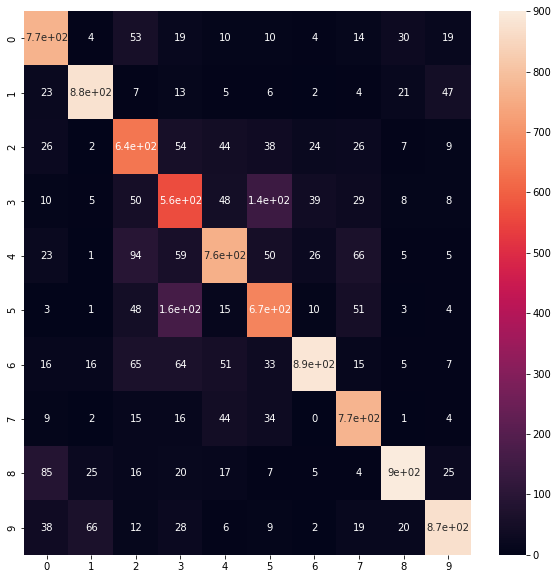

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

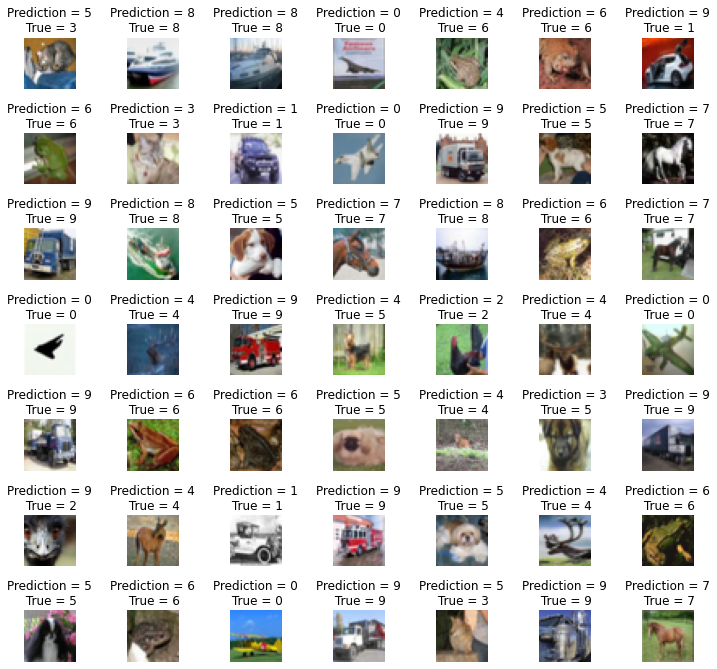

In [94]:
L=7
W=7
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()


for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')


plt.subplots_adjust(wspace = 1)